In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.io import imread_collection
from ast import Yield
import matplotlib.pyplot as plt
import glob
import cv2
import os

In [2]:
height= 80
width=200

In [5]:
train_path = 'data/train/*.png'
val_path = 'data/validation/*.png'
y_path = 'data/train.csv'
y_val_path ='data/validation.csv'
Y_train = pd.read_csv(y_path, dtype=str)
Y_val = pd.read_csv(y_val_path, dtype=str)
train = imread_collection(train_path)
val = imread_collection(val_path)
Y_train_digits= []
Y_val_digits = []
Y_train['Label'] = Y_train['Label'].astype(str)
Y_val['Label'] = Y_val['Label'].astype(str)


c =0
window = 33
X_train=[]
X_val=[]
X_train2=[]
for image in train:

    for x in range (1,6):
        roi = image[0:height, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_train_digits.append(Y_train['Label'].iloc[c][x-1])
        X_train.append(normalized_image)
        
    c+=1
c =0

for image in val:

    for x in range (1,6):
        roi = image[0:80, x+window*(x-1):x+window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_val_digits.append(Y_val['Label'].iloc[c][x-1])
        X_val.append(normalized_image)
        
    c+=1
    
X_train = np.array(X_train).reshape(-1, height, window, 1)
X_val =np.array(X_val).reshape(-1, height, window, 1)
Y_train_digits = pd.DataFrame(Y_train_digits, columns=['Label'])
Y_val_digits = pd.DataFrame(Y_val_digits, columns=['Label'])

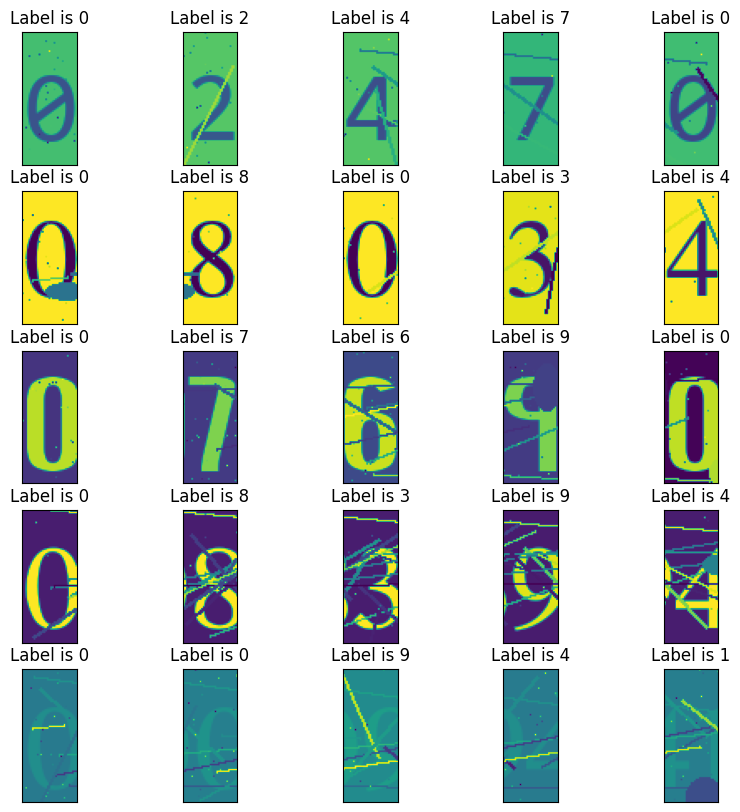

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    label = Y_train_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

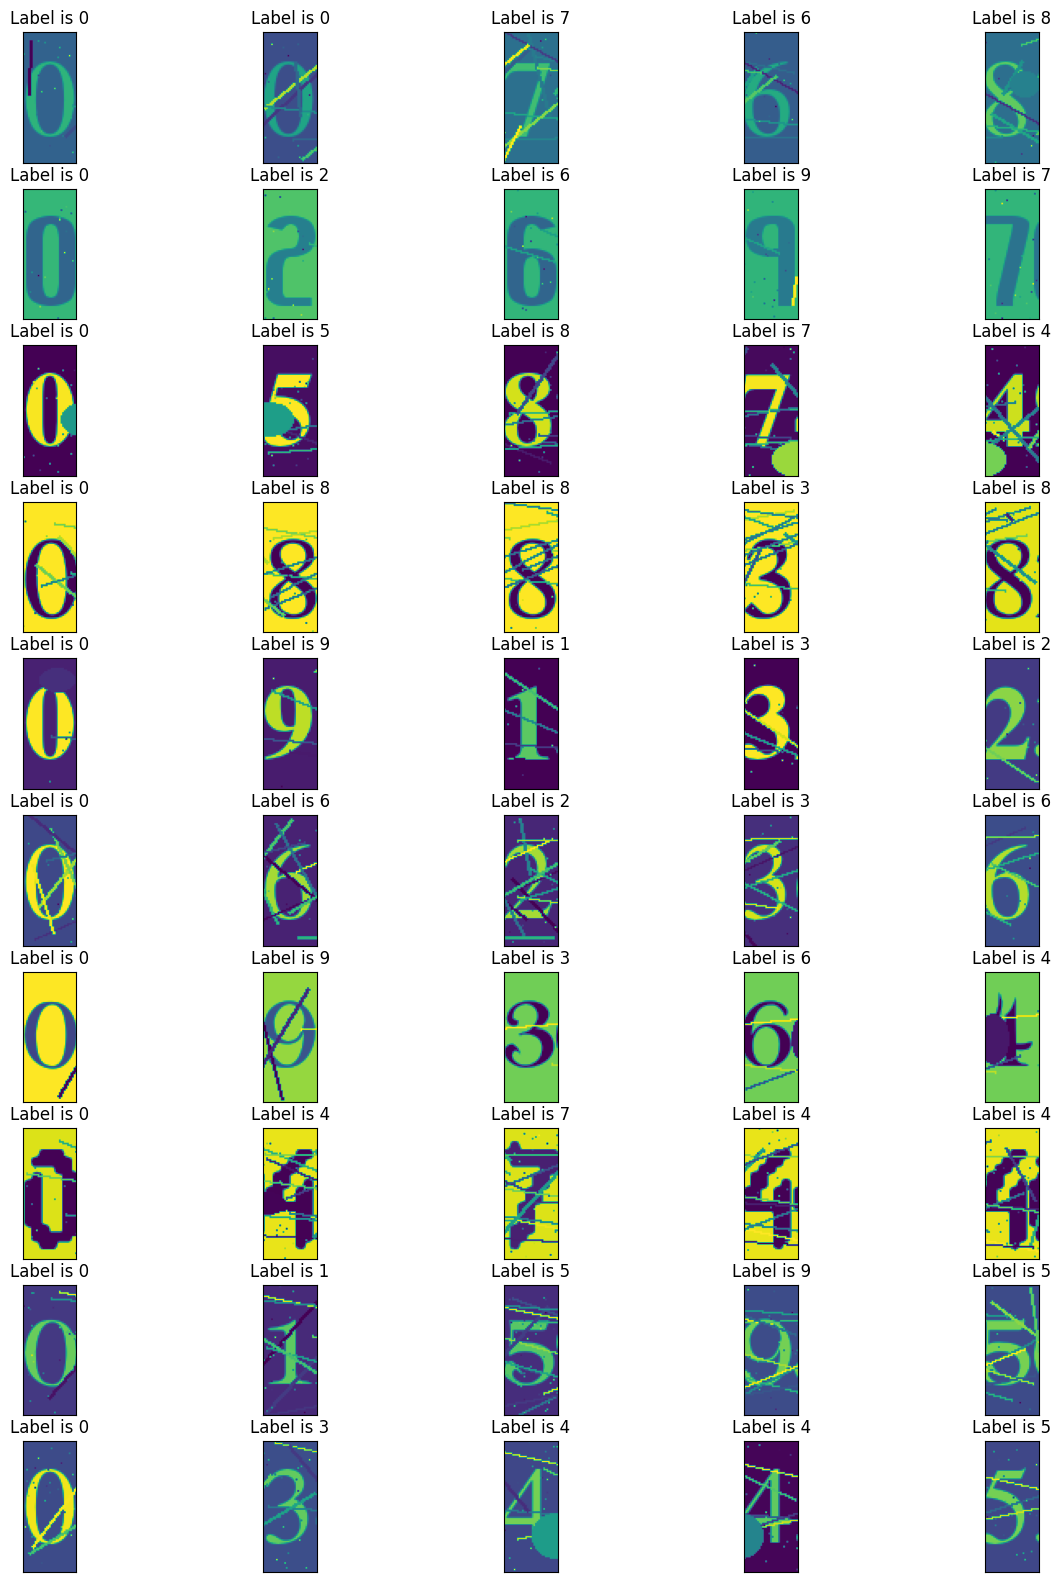

In [7]:
plt.figure(figsize=(15,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i])
    label = Y_val_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Y_train_labels = Y_train_digits['Label'].to_numpy()
y_combine = LabelEncoder().fit_transform(Y_train_labels)
y_one_hot = OneHotEncoder().fit_transform(y_combine.reshape(len(y_combine),1))

In [8]:
from keras.utils import to_categorical
Y_train_one_hot = to_categorical(Y_train_digits)
Y_val_one_hot = to_categorical(Y_val_digits)

In [13]:
print(Y_train_one_hot.shape)
print(Y_val_one_hot.shape)

(50000, 10)
(5000, 10)


In [10]:
X_train= np.array(X_train)
print(X_train.shape)
print(X_val.shape)


(50000, 80, 33, 1)
(5000, 80, 33, 1)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(80,window,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

c:\Users\Yuli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train_one_hot, validation_data=(X_val, Y_val_one_hot), epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7427 - loss: 0.8463 - val_accuracy: 0.7566 - val_loss: 0.7701
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9313 - loss: 0.2354 - val_accuracy: 0.7304 - val_loss: 0.8633
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9646 - loss: 0.1224 - val_accuracy: 0.6814 - val_loss: 1.2529
